In [14]:
import numpy as np
import matplotlib.pyplot as plt
import hamhelper.plotting as hp
import math

## Question 2

In [15]:
# Helper functions
def einSol_microstates(E, N):
    """Return the number of microstates of an Einstein solid of N particles at energy E. For low N.

    Args:
        E (int): Energy
        N (int): Particle number
    """
    return math.factorial(E + N - 1) / (math.factorial(E) * math.factorial(N - 1))



In [17]:
# Initial conditions
nA = 4
energy_A = 10
nB = 4
energy_B = 2

omega_A = einSol_microstates(energy_A, nA)
omega_B = einSol_microstates(energy_B, nB)

print('Initial States')
print(f'Microstates in A = {omega_A}.')
print(f'Microstates in  = {omega_B}.')
print("This matches the given values in the questions!")


Initial States
Microstates in A = 286.0.
Microstates in  = 10.0.
This matches the given values in the questions!


### (A)
The probability that system A has energy $E_A$ is given by the number of microstates for this configuration after mixing. The total number of states is
$$
\Omega_A \times \Omega_B = 286 \times 10 = 2860.
$$

E_A = 0 	E_B = 12 	P_A = 9.030e-03.
E_A = 1 	E_B = 11 	P_A = 2.890e-02.
E_A = 2 	E_B = 10 	P_A = 5.676e-02.
E_A = 3 	E_B = 9 	P_A = 8.732e-02.
E_A = 4 	E_B = 8 	P_A = 1.146e-01.
E_A = 5 	E_B = 7 	P_A = 1.334e-01.
E_A = 6 	E_B = 6 	P_A = 1.400e-01.
E_A = 7 	E_B = 5 	P_A = 1.334e-01.
E_A = 8 	E_B = 4 	P_A = 1.146e-01.
E_A = 9 	E_B = 3 	P_A = 8.732e-02.
E_A = 10 	E_B = 2 	P_A = 5.676e-02.
E_A = 11 	E_B = 1 	P_A = 2.890e-02.
E_A = 12 	E_B = 0 	P_A = 9.030e-03.


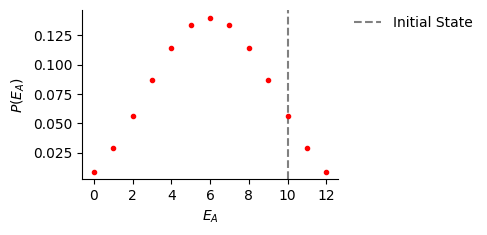

In [49]:
max_E = energy_A + energy_B

def P_A(Ea, max_E=max_E):
    mstatesA = einSol_microstates(Ea, nA)
    mstatesB = einSol_microstates(max_E - Ea, nB)
    prob = mstatesA*mstatesB/2860
    return prob/17.618181818181814

arr_E_A = []
arr_P_A = []
for E in range(max_E + 1):
    print(f"E_A = {E} \tE_B = {max_E - E} \tP_A = {P_A(E):.3e}.")
    arr_E_A.append(E)
    arr_P_A.append(P_A(E))

# Start plot
fig, ax = plt.subplots(1, 1, figsize = [3.3,2.2])

# Plot probabilities
ax.plot(arr_E_A, arr_P_A, 'r.')

# Plot initial cond
ax.axvline(energy_A, color='grey', linestyle='dashed', label='Initial State', zorder=1)

ax.set(xlabel=r"$E_A$", ylabel=r'$P(E_A)$', xticks=[0, 2, 4, 6, 8, 10, 12])
hp.despine()
ax.legend(framealpha=0, bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.show()

## (B)
For probabilities that energy is transferred from one subsystem to another we can use
$$
P(\text{Energy stays same}) + P(\text{A Gains Energy}) + P(\text{A Loses Energy}) = 1.
$$
Or in other words, for energy being transfered from A to B:
$$
\begin{align}
P(\text{A Loses Energy}) &= 1 - P(\text{Energy stays same}) - P(\text{A Gains Energy})\\
P(\text{A Loses Energy}) &= 1 - P(E_{A}=10) - (P(E_{A} = 11) - P(E_{A} = 12))
\end{align}
$$

In [56]:
# For A losing energy
P_a_loses_energy = 1 - P_A(10) - P_A(11) - P_A(12)
print(f'P(A loses energy) = {P_a_loses_energy:.4f}')

# Similarly we can find the converse probability A gains energy from subsystem B as
P_a_gains_energy = P_A(11) + P_A(12)
print(f'P(A gains energy) = {P_a_gains_energy:.4f}')

P(A loses energy) = 0.9053
P(A gains energy) = 0.0379


There fore we conclude that it is **much** more probable that energy is transfered from subsystem A to subsystem B. We define A as the hotter subsystem and the probability that energy goes from the hotter to colder subsystem is $P=0.9053$. For a smaller subsystem (Table 4.3 in the textbook) with less energy ($E_{tot}=6$) we note that there are fewer microstates.

Taking $E_A = E_{A0}/2 = 5$ we find that
$$
\begin{align}
P(\text{A Loses Energy}) &= 1 - \frac{12}{84} - \frac{7}{84} \approx 0.77\\
\end{align}
$$
which is smaller than the larger system. This is because the relative number of "colder" microstates to "hotter" microstates for subsystem A is much lower with fewer total microstates in the whole system. There are "less ways for it to cool" and so the probability has decreased.

**We can say that the larger system is hotter initially**.

## (C)
What is the number of accessible microstates for the composite system after the constraint has been relaxed? And the change in entropy (letting k=1)?

In [59]:
# Copied from (a)
microstates = []
for E in range(max_E + 1):
    EA = E
    EB = max_E - E
    # Microstates for each
    omega_A = einSol_microstates(EA, nA)
    omega_B = einSol_microstates(EB, nB)
    # Calculate combined microstates
    omega_AB = omega_A*omega_B
    print(f"E_A = {EA} \tE_B = {EB} \tCombined microstates = {omega_AB:.3e}")
    microstates.append(omega_AB)
print(f'\nTotal number of microstates = {np.sum(microstates):.0f}')

# Calculate entropy
# Before
S0 = 1*np.log(2860)
# After
S1 = 1*np.log(np.sum(microstates))
print('\nWe find the entropy change as')
print(f'Before S = {S0:.2e}')
print(f'After  S = {S1:.2e}')
print(f'Difference = {S1 - S0:.2e}')

E_A = 0 	E_B = 12 	Combined microstates = 4.550e+02 	.
E_A = 1 	E_B = 11 	Combined microstates = 1.456e+03 	.
E_A = 2 	E_B = 10 	Combined microstates = 2.860e+03 	.
E_A = 3 	E_B = 9 	Combined microstates = 4.400e+03 	.
E_A = 4 	E_B = 8 	Combined microstates = 5.775e+03 	.
E_A = 5 	E_B = 7 	Combined microstates = 6.720e+03 	.
E_A = 6 	E_B = 6 	Combined microstates = 7.056e+03 	.
E_A = 7 	E_B = 5 	Combined microstates = 6.720e+03 	.
E_A = 8 	E_B = 4 	Combined microstates = 5.775e+03 	.
E_A = 9 	E_B = 3 	Combined microstates = 4.400e+03 	.
E_A = 10 	E_B = 2 	Combined microstates = 2.860e+03 	.
E_A = 11 	E_B = 1 	Combined microstates = 1.456e+03 	.
E_A = 12 	E_B = 0 	Combined microstates = 4.550e+02 	.

Total number of microstates = 50388

We find the entropy change as
Before S = 7.96e+00
After  S = 1.08e+01
Difference = 2.87e+00


Therefore, using the same code from part (a), we find the total microstates of the combined system to be $50388$.\
To calculate the entropy we use
$$
S = 1\ln{\Omega_{tot}}
$$
to find the difference in entropy to be $\Delta S = 2.87$, letting $k=1$.

## (d)
Calculate the following quantities and compare the final one with the value in Table 4.3 of the text.

i. $\bar{E}_A$\
ii. $\tilde{E}_A$\
iii. $\sigma_A$\
iv. $\sigma_B$\
v. $\sigma_A/\bar{E}_A$

For the standard deviations I employ $\sigma = \sqrt{\langle E^2_A\rangle - \langle E_A\rangle^2}$

E_A = 0 	E_B = 12 	Combined microstates = 4.550e+02	P(E_A) = 9.03e-03
E_A = 1 	E_B = 11 	Combined microstates = 1.456e+03	P(E_A) = 2.89e-02
E_A = 2 	E_B = 10 	Combined microstates = 2.860e+03	P(E_A) = 5.68e-02
E_A = 3 	E_B = 9 	Combined microstates = 4.400e+03	P(E_A) = 8.73e-02
E_A = 4 	E_B = 8 	Combined microstates = 5.775e+03	P(E_A) = 1.15e-01
E_A = 5 	E_B = 7 	Combined microstates = 6.720e+03	P(E_A) = 1.33e-01
E_A = 6 	E_B = 6 	Combined microstates = 7.056e+03	P(E_A) = 1.40e-01
E_A = 7 	E_B = 5 	Combined microstates = 6.720e+03	P(E_A) = 1.33e-01
E_A = 8 	E_B = 4 	Combined microstates = 5.775e+03	P(E_A) = 1.15e-01
E_A = 9 	E_B = 3 	Combined microstates = 4.400e+03	P(E_A) = 8.73e-02
E_A = 10 	E_B = 2 	Combined microstates = 2.860e+03	P(E_A) = 5.68e-02
E_A = 11 	E_B = 1 	Combined microstates = 1.456e+03	P(E_A) = 2.89e-02
E_A = 12 	E_B = 0 	Combined microstates = 4.550e+02	P(E_A) = 9.03e-03

Mean E_A       = 6.00
Most Prob. E_A = 6.00

Mean squared energy = 42.67
Mean energy squared = 3

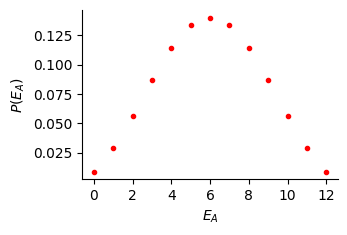

In [95]:
# Copied from (c)
microstates = []
energy_in_A = []
prob_of_A = []
for E in range(max_E + 1):
    EA = E
    EB = max_E - E
    # Microstates for each
    omega_A = einSol_microstates(EA, nA)
    omega_B = einSol_microstates(EB, nB)
    # Calculate combined microstates
    omega_AB = omega_A*omega_B
    print(f"E_A = {EA} \tE_B = {EB} \tCombined microstates = {omega_AB:.3e}\tP(E_A) = {omega_AB/50388:.2e}")
    microstates.append(omega_AB)
    energy_in_A.append(EA)
    prob_of_A.append(omega_AB/50388)

microstates = np.array(microstates)
energy_in_A = np.array(energy_in_A)
prob_of_A = np.array(prob_of_A)

# Find values - Print to console
# Mean A
mean_A = np.dot(microstates, energy_in_A)/np.sum(microstates)
# Most probable A is where microstates are max
prob_A = energy_in_A[np.argmax(microstates)]
# Standard deviation of both distributions
# Using the expression noted
mean_squared_energy = np.sum(prob_of_A*energy_in_A**2)
std_A = np.sqrt(np.sum(prob_of_A*energy_in_A**2) - np.sum(prob_of_A*energy_in_A)**2)
std_B = np.sqrt(np.sum(prob_of_A*(max_E-energy_in_A)**2) - np.sum(prob_of_A*(max_E-energy_in_A))**2)
print(f'\nMean E_A       = {mean_A:.2f}')
print(f'Most Prob. E_A = {prob_A:.2f}')


print(f"\nMean squared energy = {np.sum(prob_of_A*energy_in_A**2):.2f}")
print(f"Mean energy squared = {np.sum(prob_of_A*energy_in_A)**2:.2f}")
print(f'stdev. A       = {std_A:.2f}')
print(f'stdev. B       = {std_B:.2f}')

# Start plot
fig, ax = plt.subplots(1, 1, figsize = [3.3,2.2])
# Plot microstates
ax.plot(energy_in_A, prob_of_A, 'r.')
ax.set(xlabel=r"$E_A$", ylabel=r'$P(E_A)$', xticks=[0, 2, 4, 6, 8, 10, 12])
hp.despine()
# ax.legend(framealpha=0, bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.show()

We found that\
$\bar{E}_A = \tilde{E}_A = 6,\text{ and}$\
$\sigma_A = \sigma_B \approx 2.58.$

From here we find the relative fluctioations as
$$
\frac{\sigma_A}{\bar{E}_A} \approx \frac{2.58}{6} = 0.43
$$

This is smaller than the value calculated in Table 4.3.

## (e)
Entropy of the composite system in its most probably macrostate is given by $\ln\Omega_A(\tilde{E}_A)\Omega_B(E_{tot}-E_A)$. Compare this value to the total entropy caluclated in part (c) to be 10.8.

In [97]:
# Calculate the entropy in most probability macrostate
s_most_prob = np.log( einSol_microstates(6, nA)*einSol_microstates(6, nB) )
print(f"S = {s_most_prob:.2e}")


S = 8.86e+00


The entropy has reduced by approximately $\Delta S = 1.94$.

## (f)
We can now compare successively larger systems, increasing N

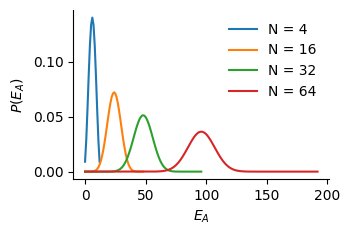

In [107]:
N_arr = [4, 16, 32, 64]  # Na = Nb = N
# Make axis to plot qualitative behaviour
fig, ax = plt.subplots(1, 1, figsize = [3.3,2.2])

# Calculate probabilities for each system
for N in N_arr:
    microstates = []
    energy_in_A = []
    prob_of_A = []
    max_energy = 3*N
    for E in range(max_energy + 1):
        EA = E
        EB = max_energy - E
        # Microstates for each
        omega_A = einSol_microstates(EA, N)
        omega_B = einSol_microstates(EB, N)
        # Calculate combined microstates
        omega_AB = omega_A*omega_B
        microstates.append(omega_AB)
        energy_in_A.append(EA)
        prob_of_A.append(omega_AB)
    energy_in_A = np.array(energy_in_A)
    # Normalize probabilities
    prob_of_A = np.array(prob_of_A)
    prob_of_A /= np.sum(prob_of_A)
    
    ax.plot(energy_in_A, prob_of_A, label = f'N = {N}')

hp.despine()
ax.set(xlabel=r'$E_A$', ylabel=r'$P(E_A)$')
plt.legend(framealpha=0)
plt.show()

Assuming we keep the energy per particle the same at $E/N=3$, we see that increasing the size of the system causes the distribution to spread out and become more gaussian in appearance (and more continuous). As the size increases, the distributions widen indicating larger standard deviations, however the relative width to mean energy falls. Larger systems occupy more energy states and so I would also guess this shows that the entropy increases.

# 